In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from keras.preprocessing.image import load_img
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# for training dataset
input_path = []
label = []

for class_name in os.listdir( r'C:\Users\Solan\OneDrive\Desktop\Solar panel fault detection\dataset1\training_set'):
    for path in os.listdir(r'C:\Users\Solan\OneDrive\Desktop\Solar panel fault detection\dataset1\training_set/'
 + class_name):
        if class_name == 'faulty':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join( r'C:\Users\Solan\OneDrive\Desktop\Solar panel fault detection\dataset1\training_set', class_name, path))
print(input_path[0], label[0])

C:\Users\Solan\OneDrive\Desktop\Solar panel fault detection\dataset1\training_set\faulty\09034_Image_1_opt-1.jpg 0


In [3]:
print(input_path[10], label[10])

C:\Users\Solan\OneDrive\Desktop\Solar panel fault detection\dataset1\training_set\faulty\108.jpg 0


In [4]:
len(label)

1240

In [5]:
#for testing dataset
input_paths = []
labels = []

for class_name in os.listdir( r'C:\Users\Solan\OneDrive\Desktop\Solar panel fault detection\dataset1\test_set'):
    for path in os.listdir( r'C:\Users\Solan\OneDrive\Desktop\Solar panel fault detection\dataset1\test_set/'+ class_name):
        if class_name == 'faulty':
            labels.append(0)
        else:
            labels.append(1)
        input_paths.append(os.path.join( r'C:\Users\Solan\OneDrive\Desktop\Solar panel fault detection\dataset1\test_set', class_name, path))
print(input_paths[0], labels[0])

C:\Users\Solan\OneDrive\Desktop\Solar panel fault detection\dataset1\test_set\faulty\5.jpg 0


In [6]:
print(input_paths[10], labels[10])

C:\Users\Solan\OneDrive\Desktop\Solar panel fault detection\dataset1\test_set\faulty\images - 2022-01-31T120710.868.jpg 0


In [7]:
len(labels)

296

In [8]:
train_data = pd.DataFrame()
train_data['images'] = input_path
train_data['label'] = label
train_data = train_data.sample(frac = 1).reset_index(drop = True)
train_data.head()

,images,label
0,C:\Users\Solan\OneDrive\Desktop\Solar panel fa...,0
1,C:\Users\Solan\OneDrive\Desktop\Solar panel fa...,0
2,C:\Users\Solan\OneDrive\Desktop\Solar panel fa...,1
3,C:\Users\Solan\OneDrive\Desktop\Solar panel fa...,0
4,C:\Users\Solan\OneDrive\Desktop\Solar panel fa...,1


In [9]:
len(train_data)

1240

In [10]:
train_data.shape

(1240, 2)

In [11]:
test_data = pd.DataFrame()
test_data['images'] = input_paths
test_data['label'] = labels
test_data = test_data.sample(frac = 1).reset_index(drop = True)
test_data.head()

,images,label
0,C:\Users\Solan\OneDrive\Desktop\Solar panel fa...,0
1,C:\Users\Solan\OneDrive\Desktop\Solar panel fa...,0
2,C:\Users\Solan\OneDrive\Desktop\Solar panel fa...,1
3,C:\Users\Solan\OneDrive\Desktop\Solar panel fa...,1
4,C:\Users\Solan\OneDrive\Desktop\Solar panel fa...,1


In [12]:
len(test_data)

296

In [13]:
test_data.shape

(296, 2)

###  Exploratory Data Analysis

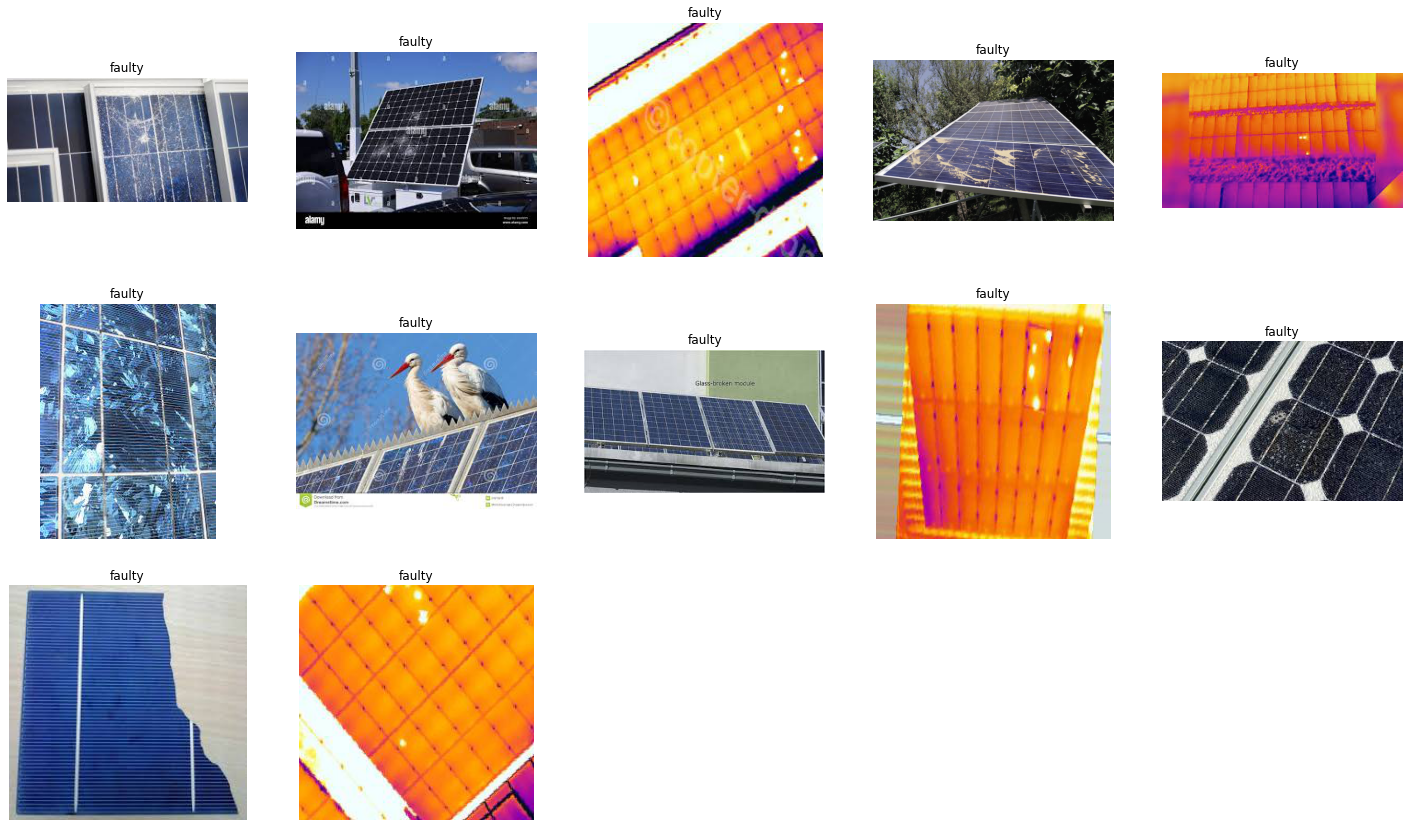

In [14]:
# to display grid of images
plt.figure(figsize = (25,25))
temp = train_data[train_data['label']== 0]['images']
start = random.randint(1, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('faulty')
    plt.axis('off')

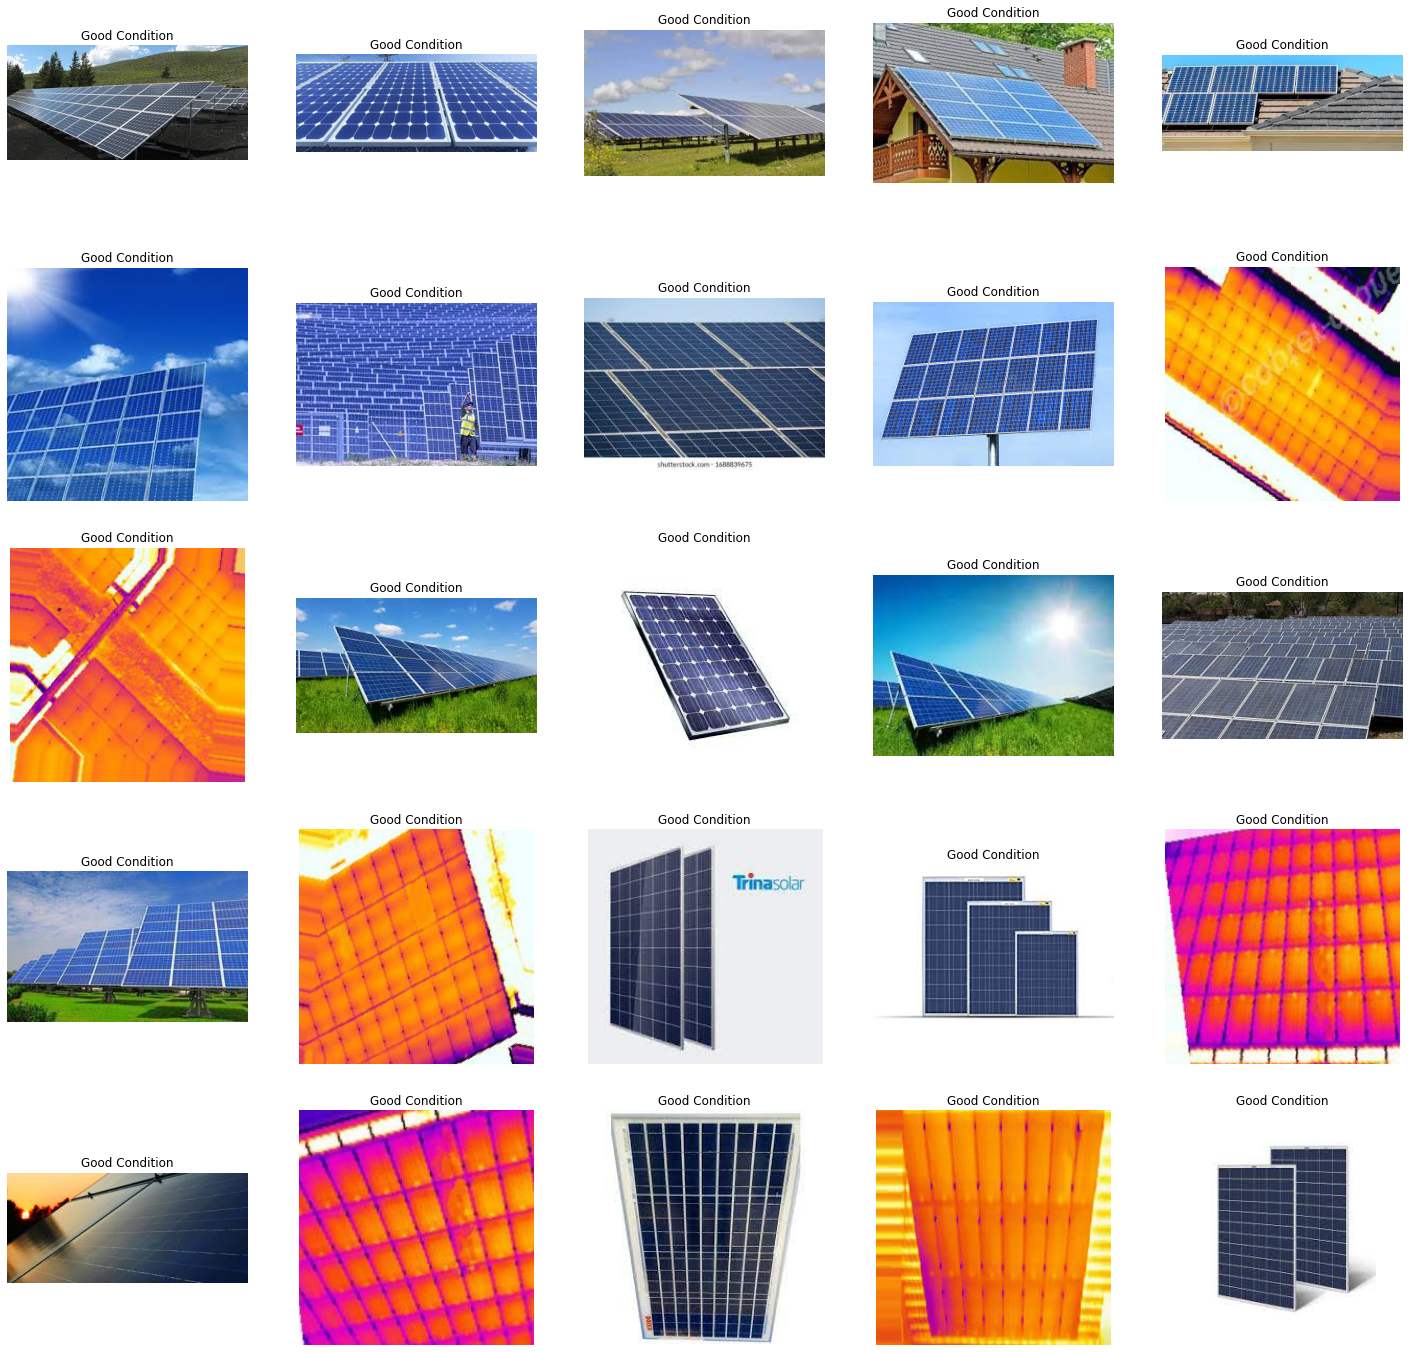

In [15]:
# to display grid of images
plt.figure(figsize = (25,25))
temp = train_data[train_data['label']== 1]['images']
start = random.randint(1, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Good Condition')
    plt.axis('off')

<AxesSubplot:xlabel='label', ylabel='count'>

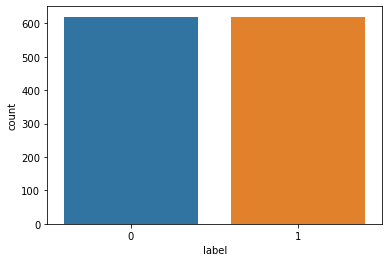

In [16]:
import seaborn as sns
sns.countplot(train_data['label'])

### Model building
* Initialising the CNN
* Step 1 - Convolution
* Step 2 - Pooling
* Step 3 - Flattening
* Step 4 - Full connection

In [17]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [18]:
# Initialising the CNN
classifier = Sequential([
    # Convolution
    Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'),
    # Pooling
    MaxPooling2D(pool_size = (2, 2)),
    # Adding a second convolution layer
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    # Adding a third convolution layer
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    # Flatting
    Flatten(),
    # Full Connection
    Dense(units = 128, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid'),
])

In [19]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [21]:
# Fitting the CNN to the images
# for training
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode ='nearest')
training_set = train_datagen.flow_from_directory(r'C:\Users\Solan\OneDrive\Desktop\Solar panel fault detection\dataset1\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1084 images belonging to 2 classes.


In [22]:
# for testing
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'C:\Users\Solan\OneDrive\Desktop\Solar panel fault detection\dataset1\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 269 images belonging to 2 classes.


In [30]:
val_generator = ImageDataGenerator(rescale = 1./255)
val_iterator = val_generator.flow_from_directory(r'C:\Users\Solan\OneDrive\Desktop\Solar panel fault detection\dataset1\test_set', 
                                                target_size=(64,64), 
                                                batch_size =32, 
                                                class_mode = 'binary')

Found 269 images belonging to 2 classes.


In [31]:
# fit the model
history = classifier.fit(training_set,
                         epochs = 30,
                         validation_data = val_iterator
                         )

Epoch 1/30
34/34 [==============================] - 7s 197ms/step - loss: 0.0598 - accuracy: 0.9806 - val_loss: 0.0201 - val_accuracy: 0.9926
Epoch 2/30
34/34 [==============================] - 7s 199ms/step - loss: 0.0358 - accuracy: 0.9862 - val_loss: 0.0167 - val_accuracy: 0.9963
Epoch 3/30
34/34 [==============================] - 7s 195ms/step - loss: 0.0363 - accuracy: 0.9899 - val_loss: 0.0156 - val_accuracy: 0.9963
Epoch 4/30
34/34 [==============================] - 7s 197ms/step - loss: 0.0316 - accuracy: 0.9889 - val_loss: 0.0360 - val_accuracy: 0.9888
Epoch 5/30
34/34 [==============================] - 7s 196ms/step - loss: 0.0715 - accuracy: 0.9751 - val_loss: 0.0628 - val_accuracy: 0.9777
Epoch 6/30
34/34 [==============================] - 7s 211ms/step - loss: 0.0508 - accuracy: 0.9760 - val_loss: 0.0141 - val_accuracy: 0.9963
Epoch 7/30
34/34 [==============================] - 7s 206ms/step - loss: 0.0272 - accuracy: 0.9908 - val_loss: 0.0163 - val_accuracy: 0.9963
Epoch 

### Visualization of results

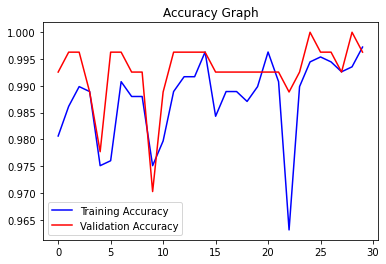

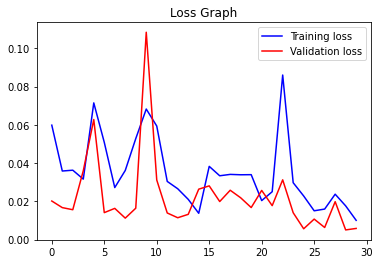

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [33]:
# Save the model for prediction
classifier.save('SolarPanelFaultDetection.h5')

In [34]:
def load_saved_model():
    return load_model('SolarPanelFaultDetection.h5')

In [35]:
import cv2
from IPython.display import Image, display

In [36]:
# Making new predictions

model = load_saved_model()
image_path = r'C:\Users\Solan\OneDrive\Desktop\Solar panel fault detection\dataset1\training_set\normal\images - 2022-01-31T112705.059.jpg'
test_image = image.load_img(image_path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print (result)

[[1.]]


Nodefect


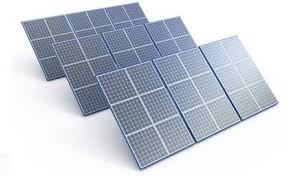

In [37]:
#training_set.class_indices
if result[0][0] == 1:
    prediction = 'NoDefect'
    print('Nodefect')
    image = cv2.imread(image_path)
    cv2.putText(image, "No Defect predicted", (10, 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    #cv2.waitKey(300)
    cv2.imshow("Predictions", image)
    display(Image(filename=image_path))
    cv2.waitKey(30000)
else:
    prediction = 'Defect'
    print('Defect')

    image = cv2.imread(image_path)
    cv2.putText(image, "Defect predicted", (10, 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    #cv2.waitKey(300)
    cv2.imshow("Predictions", image)
    display(Image(filename=image_path))
    cv2.waitKey(30000)